--- 
<center>
<h3> ESPACIO PARA BANNER DE LA MAESTRIA </h3> 
</center>

---

## Ejercicios prácticos
# Descomposición en Valores Singulares
Usaremos los datos de Georghiades, Belhumeur y Kriegman (2001) compuestos por 327 imagenes de 38 individuos bajo 9 poses y 64 condiciones lumínicas para construir unos **eigen-rostros**. Es decir que extraeremos las correlaciones más dominantes entre las imagenes y las usaremos para comprimir imágenes.

In [2]:
# Definimos nuestro directorio usando el paquete os
import os
# En mi caso, las imagenes están guardadas en la carpeta de descargas
os.chdir(r"C:\Users\User\Downloads") 

In [3]:
# Vamos a cargar las imágenes que están dentro del archivo "allFaces.mat"
import scipy.io
# El archivo es nativo de Matlab por lo que usaremos una función loadmat del 
train = caras[:, :np.sum(n_caras[:36])]
contenido = scipy.io.loadmat('allFaces.mat')
# En total tenemos 2282 imágenes
# de las personas, entonces creamos un nuevo objeto con la información relevante
caras = contenido['faces']

In [4]:
# Cada imagen tiene un tamaño de 192 pixeles de alto por 168 pixeles de ancho. Sin embargo,
# para este ejercicio cada imagen se transformó en un vector de longitud 32,256 (192x168). 
# En total tenemos 2410 imágenes para un total de 38 personas por lo que en promedio, cada persona
# tiene al rededor de 64 fotos en la muestra.
caras.shape

(32256, 2410)

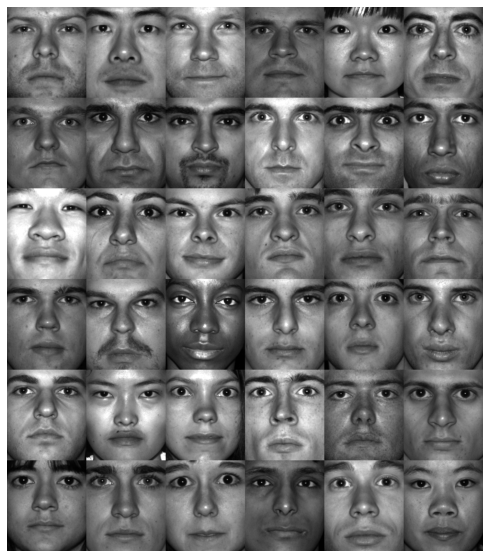

In [5]:
# A continuación vamos a visualizar algunas fotografías

# Extraemos las dimensiones de la foto:
train = caras[:, :np.sum(n_caras[:36])]
ancho = int(contenido['m'])
# En total tenemos 2282 imágenes
# Este vector es el que podríamos guardar en vez de la imagen original
alpha = U[:, :r].T @ test_escalado
reconstruccion = U[:, :r]  @ alpha
reconstruccion = reconstruccion + rostro_promedio
img = plt.imshow(np.reshape(reconstruccion, (ancho, alto)).T)
img.set_cmap('gray')
plt.title('r = ' + str(r))
plt.axis('off')
plt.show()
# visualizarlas
conteo = 0
for j in range(6):
    for k in range(6):
        grilla[j*alto : (j+1)*alto, k*ancho : (k+1)*ancho] = np.reshape(caras[:,np.sum(n_caras[:conteo])],(ancho,alto)).T
        conteo += 1

# Visualizamos el resultado
import matplotlib.pyplot as plt

# Parámetros de las imágenes
plt.rcParams['figure.figsize'] = [10, 10] 

img = plt.imshow(grilla)
# Como nuestras imágenes son a blanco y negro específicamos la siguiente linea
img.set_cmap('gray') 
plt.axis('off')
plt.show()

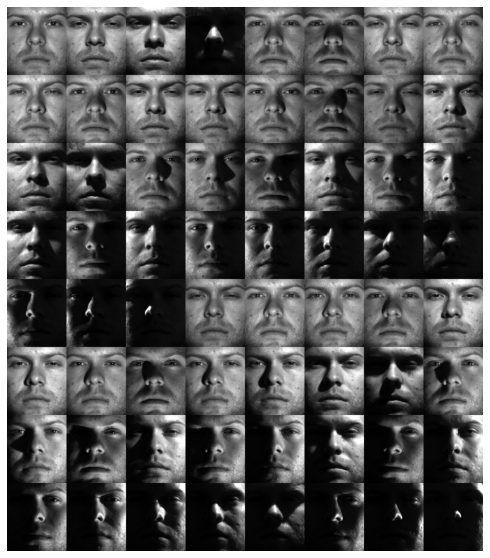

In [21]:
# Para ver todas las imágenes de un solo sujeto podemos hacer lo siguiente
# Escogemos un sujeto, por ejemplo el primero (recuerde que Python es 0-index)
sujeto = 0
train = caras[:, :np.sum(n_caras[:36])]
grilla = np.zeros((alto*8, ancho*8))
# En total tenemos 2282 imágenes
# Este vector es el que podríamos guardar en vez de la imagen original
alpha = U[:, :r].T @ test_escalado
reconstruccion = U[:, :r]  @ alpha
reconstruccion = reconstruccion + rostro_promedio
img = plt.imshow(np.reshape(reconstruccion, (ancho, alto)).T)
img.set_cmap('gray')
plt.title('r = ' + str(r))
plt.axis('off')
plt.show()
plt.axis('off')
plt.show()

In [33]:
# Vamos a construir una muestra de entrenamiento con las fotos de las primeras 36 personas.

# Note que cada columna dentro de caras es un rostro
train = caras[:, :np.sum(n_caras[:36])]
train.shape
# En total tenemos 2282 imágenes


(32256, 2282)

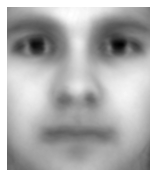

In [37]:
# Vamos a construir el rostro promedio
rostro_promedio = np.mean(train, axis=1) # Es decir la media por columnas o la media por píxel

train = caras[:, :np.sum(n_caras[:36])]
rostro_promedio2 = np.reshape(rostro_promedio,(ancho, alto)).T
# En total tenemos 2282 imágenes
img = plt.imshow(rostro_promedio2)
img.set_cmap('gray')
plt.axis('off')
plt.show()
# Alguna vez pensó en encontrar el promedio de unas imágenes? 
# En este caso es particularmente sencillo porque las imágenes están cortadas y centradas para
# tener las mismas posiciones entre imágenes.

In [38]:
# Ahora vamos a hacer la Descompsición en Valores Singulares (DVS) de nuestra base de entrenamiento
# Pero antes vamos a re escalar nuestra muestra.
X = train - np.tile(rostro_promedio, (train.shape[1], 1)).T
# Usamos el DVS económico porque solo estamos interesados en los valores singulares que no son 0.
U, S, VT = np.linalg.svd(X, full_matrices = False) # Esto puede tardar un poco

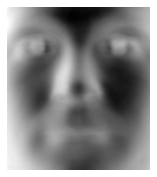

In [47]:
# En esencia lo que hace la DVS es que cualquier rostro de la base de entrenamiento es una 
# combinación lineal de los eigen-rostros.

train = caras[:, :np.sum(n_caras[:36])]
img = plt.imshow(np.reshape(U[:,0],(ancho, alto)).T)
# En total tenemos 2282 imágenes
plt.axis('off')
plt.show()

In [49]:
U.shape

(32256, 2282)

Ahora bien. Nuestros eigen-rostros están contenidos en la matriz $U$. Usando los primeros $r$ componenetes de $U$ vamos a representar aproximadamente los rostros de las personas 37 y 38 que no están dentro de nuestra muestra usando la siguiente proyección:
$$\tilde{x}_{test}=\tilde{U_r}\alpha$$
$$\tilde{x}_{test}=\tilde{U_r}\tilde{U_r}^tx_{test}$$

Note que la dimensión de $x_{test}$ será de longitud 32,356 (192x168), pero que $\alpha$ tiene longitud $r$. En general $r<<32,356$. Por tal motivo es posible guardar el componente $\alpha$ de cada imagen en vez de la imagen completa y de este modo ahorrar mucho espacio de almacenamiento una vez se tengan unos eigen-rostros consolidados. 

Empresas como Facebook hacen uso de la DVS en sus algoritmos de autotageo en las fotos.

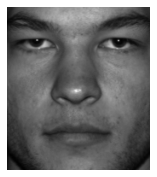

In [51]:
# Lo que queremos realizar es usar una nueva imagen, es decir que esté por fuera de
# la muestra de entrenamiento, para proyectarla en un subespacio r de los eigen rostros.

train = caras[:, :np.sum(n_caras[:36])]
test = caras[:,np.sum(n_caras[:36])]
# En total tenemos 2282 imágenes
img = plt.imshow(np.reshape(test,(ancho, alto)).T)
img.set_cmap('gray')
plt.axis('off')
plt.show()

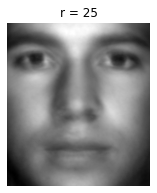

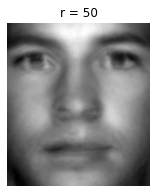

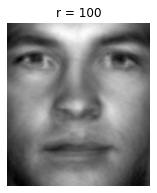

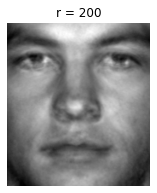

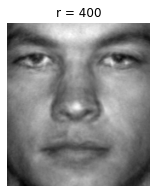

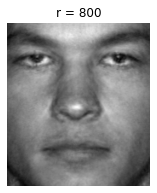

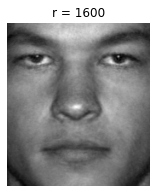

In [52]:
# Veamos como se ve la proyección de la cara para diferentes r
test_escalado = test - rostro_promedio
lista_r = [25, 50, 100, 200, 400, 800, 1600]
train = caras[:, :np.sum(n_caras[:36])]
# Esto es demoradito
# En total tenemos 2282 imágenes
# Este vector es el que podríamos guardar en vez de la imagen original
alpha = U[:, :r].T @ test_escalado
reconstruccion = U[:, :r]  @ alpha
reconstruccion = reconstruccion + rostro_promedio
img = plt.imshow(np.reshape(reconstruccion, (ancho, alto)).T)
img.set_cmap('gray')
plt.title('r = ' + str(r))
plt.axis('off')
plt.show()


Note que para $r\leq200$ las imágenes no son muy fidedignas pero para $r\geq400$ la proyección es bastante parecida a la imágen original.

Adicionalmente, proyectaremos todas las imágenes de dos individuos en los componentes principales número 5 y 6.

<ipython-input-58-db027a4caeec>:16: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(PCACoordsP1[0,:], PCACoordsP1[1,:], 'd', Color = 'k', label = 'Persona 2')
<ipython-input-58-db027a4caeec>:17: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(PCACoordsP2[0,:], PCACoordsP2[1,:], '^', Color = 'r', label = 'Persona 7')


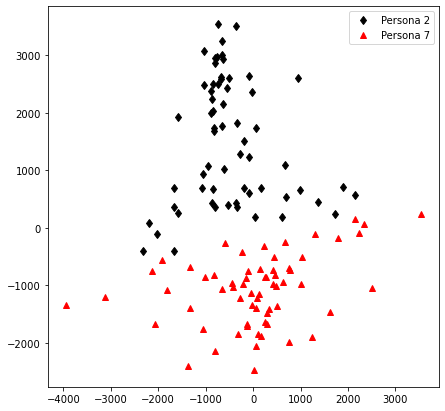

In [58]:
P1num = 2  # Persona número 2
P2num = 7  # Persona número 7

P1 = caras[:,np.sum(n_caras[:(P1num-1)]):np.sum(n_caras[:P1num])]
P2 = caras[:,np.sum(n_caras[:(P2num-1)]):np.sum(n_caras[:P2num])]

# Estandarizamos los rostros
P1 = P1 - np.tile(rostro_promedio, (P1.shape[1],1)).T
P2 = P2 - np.tile(rostro_promedio, (P2.shape[1],1)).T

PCA = [5, 6] # Proyectamos en los componentes 5 y 6
PCACoordsP1 = U[:, PCA - np.ones_like(PCA)].T @ P1
PCACoordsP2 = U[:, PCA - np.ones_like(PCA)].T @ P2

plt.rcParams['figure.figsize'] = [7, 7] 
plt.plot(PCACoordsP1[0,:], PCACoordsP1[1,:], 'd', Color = 'k', label = 'Persona 2')
plt.plot(PCACoordsP2[0,:], PCACoordsP2[1,:], '^', Color = 'r', label = 'Persona 7')

plt.legend()
plt.show()


Note que se podría partir el espacio casi que perfectamente en $y = 0$ y con esto poder clasificar un rostro como Persona 2 para $y > 0$ y Persona 7 $y < 0$.

Por tal motivo, los eigen-rostros también pueden ser utilizados para facilitar el ejercicio de los algoritmos de clasificación de rostros.

Note que muchas de las fotos que están proyectadas en el mapa anterior cuentan con poca iluminación y que incluso así se logra discretizar bastante bien el espacio.

## Referencias
Georghiades, A. S., Belhumeur, P. N., &; Kriegman, D. J. (2001). From few to many: Illumination cone models for face recognition under variable lighting and pose. *IEEE Transactions on Pattern Analysis and Machine Intelligence*, 23(6), 643–660. https://doi.org/10.1109/34.927464 
 